In [2]:
import pandas as pd
import tensorflow as tf

In [3]:
exp_1 = pd.read_excel("EXP-00001-Master.xlsx")
exp_2 = pd.read_excel('EXP-00002-Master.xlsx')
exp_3 = pd.read_excel('EXP-00003-Master.xlsx')
exp_4 = pd.read_excel('EXP-00004-Master.xlsx')
exp_5 = pd.read_excel('EXP-00005-Master.xlsx')

In [4]:
exp_1.drop(index=0, inplace=True)
exp_2.drop(index=0, inplace=True)
exp_3.drop(index=0, inplace=True)
exp_4.drop(index = 0, inplace = True)
exp_5.drop(index = 0, inplace= True)

exp_1.reset_index(drop=True, inplace=True)
exp_2.reset_index(drop=True, inplace=True)
exp_3.reset_index(drop=True, inplace=True)
exp_4.reset_index(drop=True, inplace=True)
exp_5.reset_index(drop=True, inplace=True)

In [ ]:
not_included = ['Id', 'Filter0','Filter1', 'Filter2','Filter3', 'Filter4', 'Filter5', 'Filter6', 'hash', 'Img Id', 'Curvature', 'Transparency', 'Angularity']
filtered = [x for x in exp_1.columns if x not in not_included]



exp_1_filtered = exp_1[filtered]
exp_2_filtered = exp_2[filtered]
exp_3_filtered = exp_3[filtered]
exp_4_filtered = exp_4[filtered]
exp_5_filtered = exp_5[filtered]

exp_1_filtered['Production Stage'] = 0
exp_2_filtered['Production Stage'] = 1
exp_3_filtered['Production Stage'] = 2
exp_4_filtered['Production Stage'] = 3
exp_5_filtered['Production Stage'] = 4

In [ ]:
data = exp_1_filtered.merge(exp_2_filtered, how= 'outer')
data = data.merge(exp_3_filtered, how = 'outer')
data = data.merge(exp_4_filtered, how = 'outer')
data = data.merge(exp_5_filtered, how='outer')

In [7]:
for x in data.columns: 
    data[x] = pd.to_numeric(data[x])

In [8]:
stage_0 = [1 if x ==0 else 0 for x in data['Production Stage'] ]
stage_1 = [1 if x ==1 else 0 for x in data['Production Stage']]
stage_2 = [1 if x ==2 else 0 for x in data['Production Stage']]
stage_3 = [1 if x ==3 else 0 for x in data['Production Stage']]
stage_4 = [1 if x ==4 else 0 for x in data['Production Stage']]

the_stages = ['stage_0', 'stage_1', 'stage_2', 'stage_3', 'stage_4']

data['stage_0'] = stage_0
data['stage_1'] = stage_1
data['stage_2'] = stage_2
data['stage_3'] = stage_3
data['stage_4'] = stage_4

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(len(filtered) * 2, input_shape=(len(filtered),)),
    tf.keras.layers.Dense(16, activation = 'relu'),
    tf.keras.layers.Dense(8, activation = 'relu'),
    tf.keras.layers.Dense(5, activation = tf.nn.softmax)])

model.compile(
    loss='categorical_crossentropy',
    optimizer='Adam',
    metrics=['accuracy'],
)

rows = data.shape[0]
eighty = int(rows * .8)

random = data.sample(frac=1)
train = random[:eighty]
test = random[eighty:]

In [10]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=5)
history = model.fit(
    train[filtered],
    train[the_stages],
    epochs=100,
    callbacks=[callback],
    validation_data = [test[filtered], test[the_stages]]
)

Epoch 1/100
4064/4064 [==============================] - 4s 935us/step - loss: 1.4691 - accuracy: 0.3414 - val_loss: 1.4639 - val_accuracy: 0.3572
Epoch 2/100
4064/4064 [==============================] - 4s 883us/step - loss: 1.4553 - accuracy: 0.3576 - val_loss: 1.4575 - val_accuracy: 0.3474
Epoch 3/100
4064/4064 [==============================] - 4s 926us/step - loss: 1.4492 - accuracy: 0.3610 - val_loss: 1.4496 - val_accuracy: 0.3624
Epoch 4/100
4064/4064 [==============================] - 4s 916us/step - loss: 1.4456 - accuracy: 0.3633 - val_loss: 1.4517 - val_accuracy: 0.3613
Epoch 5/100
4064/4064 [==============================] - 4s 899us/step - loss: 1.4439 - accuracy: 0.3635 - val_loss: 1.4437 - val_accuracy: 0.3641
Epoch 6/100
4064/4064 [==============================] - 4s 890us/step - loss: 1.4418 - accuracy: 0.3644 - val_loss: 1.4601 - val_accuracy: 0.3528
Epoch 7/100
4064/4064 [==============================] - 4s 890us/step - loss: 1.4406 - accuracy: 0.3653 - val_loss: 1

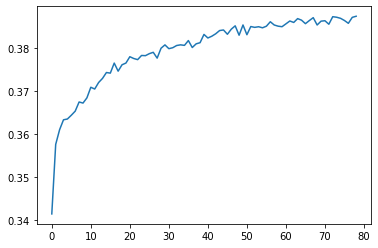

In [18]:
import matplotlib.pyplot as plt
history.history['accuracy']

plt.plot(history.epoch, history.history['accuracy'])
plt.savefig('output.png')